In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

In [9]:
import astropy.constants as ac

#Constants to be used later
GMsun = ac.GM_sun.value                                  #G*(Solar Mass)
c = ac.c.value                                           #Speed of light in vacuum
dsun = GMsun/(c**2)                                      #Natural length scale
tsun = GMsun/(c**3)   
pc = ac.pc.value                                         #One parsec
yr = (365.25)*(24)*(60)*(60)

In [17]:
def get_omg(t,t_a,omg_a,m_c,eta,nu,chi_A,chi_S):
    m=m_c/eta**(3/5)
    tN_ = m_c*omg_a*tsun
    tm_ = m*omg_a*tsun
    tmta_ = t-t_a
    delta=np.sqrt(1-4*eta)
    tau = 1-256/5*omg_a*tN_**(5/3)*tmta_
    Q15=(-113/12*chi_A*delta+19/3*chi_S*eta-113/12*chi_S+4*pi)
    ww=(omg_a*(((371/128*eta**2+56975/16128*eta+1855099/903168)/tau**(7/8)+(-3058673/
    1354752-617/192*eta**2-5429/1344*eta)/tau**(11/8)+(-605/192*eta**2-40865/8064*eta-\
    2760245/1354752)/tau**(13/8)+(1331/384*eta**2+89903/16128*eta+6072539/2709504)/
    tau**(19/8))*tm_**(4/3)*nu**2+(3/5/tau**(11/8)*Q15-3/5/tau**(3/4)*Q15)*tm_*nu**(3/2)+
    ((11/8*eta+743/672)/tau**(5/8)+(-11/8*eta-743/672)/tau**(11/8))*tm_**(2/3)*nu+1/
    tau**(3/8)))
    return ww

In [52]:
t=np.linspace(0,10,100)*yr
t_a=0
omg_a=6e-7 #
m_c=1e9
eta=1/4
nu=1
chi_A=0.4
chi_S=0.5
#chi_A ranges from (-0.5,0.5)
#chi_S ranges from (0,1)

In [53]:
omg_arr=get_omg(t,t_a,omg_a,m_c,eta,nu,chi_A,chi_S)

In [54]:
omg_arr_Q=get_omg(t,t_a,omg_a,m_c,eta,0,chi_A,chi_S)

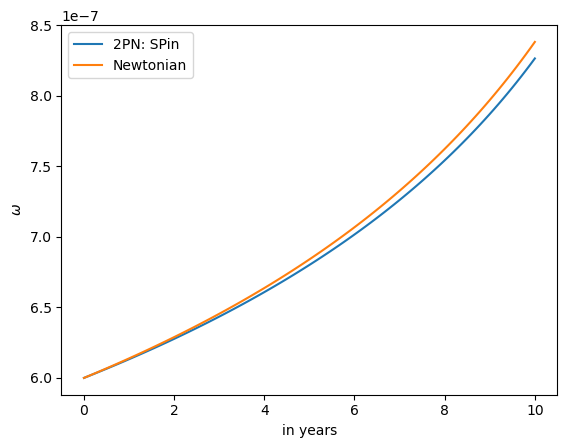

In [61]:
plt.plot(t/yr,omg_arr)
plt.plot(t/yr,omg_arr_Q)
plt.legend(["2PN: SPin","Newtonian"])

plt.xlabel("time in years")
plt.ylabel(r"$\omega$")
plt.show()